In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Jul 15 14:31:09 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    34W /  70W |    421MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
from sklearn import preprocessing
#preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True).fit_transform(x)


## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0715 14:53:33.629221 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 14:53:33.649914 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 14:53:33.653505 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 14:53:39.212284 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 14:53:39.221946 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 14:53:42.094168 140277217810304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 14:53:42.149253 140277217810304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.9249 - acc: 0.3057 - val_loss: 1.7398 - val_acc: 0.3771
Epoch 2/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6996 - acc: 0.3900 - val_loss: 1.6231 - val_acc: 0.4208
Epoch 3/100
50000/50000 [==============================] - 2s 35us/step - loss: 1.6052 - acc: 0.4251 - val_loss: 1.6539 - val_acc: 0.4014
Epoch 4/100
50000/50000 [==============================] - 2s 35us/step - loss: 1.5578 - acc: 0.4422 - val_loss: 1.5703 - val_acc: 0.4404
Epoch 5/100
50000/50000 [==============================] - 2s 35us/step - loss: 1.5061 - acc: 0.4640 - val_loss: 1.4942 - val_acc: 0.4677
Epoch 6/100
50000/50000 [==============================] - 2s 36us/step - loss: 1.4626 - acc: 0.4776 - val_loss: 1.4880 - val_acc: 0.4709
Epoch 7/100
50000/50000 [==============================] - 2s 35us/step - loss: 1.4350 - acc: 0.4884 - val_loss: 1.4699 - 

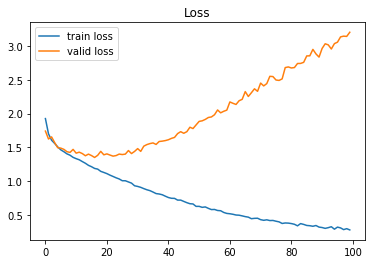

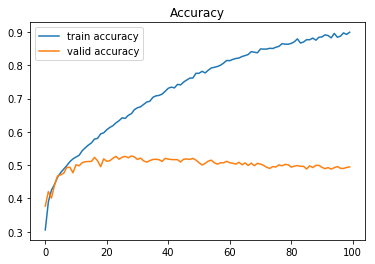

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [16]:
"""Code Here
建立你的神經網路
"""

def build_mlp1(input_shape, output_units=10, num_neurons=[512, 486,384,312,256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  

model1 = build_mlp1(input_shape=x_train.shape[1:])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 486)               249318    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 384)               187008    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 312)               120120    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               80128     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               32896     
__________

In [0]:
optimizer1 = keras.optimizers.Adam(lr=LEARNING_RATE)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer1)

In [18]:
model1.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9201 - acc: 0.2957 - val_loss: 1.7461 - val_acc: 0.3699
Epoch 2/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.7213 - acc: 0.3794 - val_loss: 1.6611 - val_acc: 0.4025
Epoch 3/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.6203 - acc: 0.4170 - val_loss: 1.6092 - val_acc: 0.4269
Epoch 4/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.5530 - acc: 0.4423 - val_loss: 1.5577 - val_acc: 0.4464
Epoch 5/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.5095 - acc: 0.4586 - val_loss: 1.5193 - val_acc: 0.4603
Epoch 6/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.4589 - acc: 0.4765 - val_loss: 1.5293 - val_acc: 0.4540
Epoch 7/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.4269 - acc: 0.4858 - val_loss: 1.4785 - 

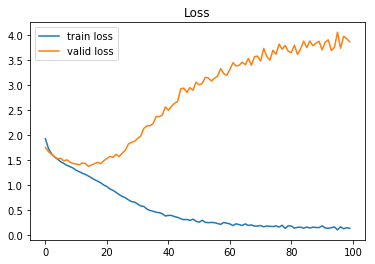

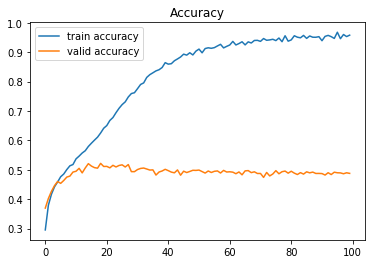

In [19]:
import matplotlib.pyplot as plt


train1_loss = model1.history.history["loss"]
valid1_loss = model1.history.history["val_loss"]

train1_acc = model1.history.history["acc"]
valid1_acc = model1.history.history["val_acc"]

plt.plot(range(len(train1_loss)), train1_loss, label="train loss")
plt.plot(range(len(valid1_loss)), valid1_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train1_acc)), train1_acc, label="train accuracy")
plt.plot(range(len(valid1_acc)), valid1_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()